In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 30.0 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sma = 20
fecha = '2021-01-01'

In [ ]:
df1 = yf.download('QQQ',start=fecha)['Close']
df1 = pd.DataFrame(df1)
df1['Retornos'] = df1.pct_change()
df1['sma'] = df1.Retornos.rolling(sma).mean()
df1.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = yf.download('BTC-USD',start=fecha)['Close']
df = pd.DataFrame(df)
df['Retornos'] = df.pct_change()
df['sma'] = df.Retornos.rolling(sma).mean()
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
caidas_btc = (df['Retornos'] < df['Retornos'].mean()).count()
caidas_qqq = (df1['Retornos']< df1['Retornos'].mean()).count()
print(caidas_btc)
print(caidas_qqq)

507
343


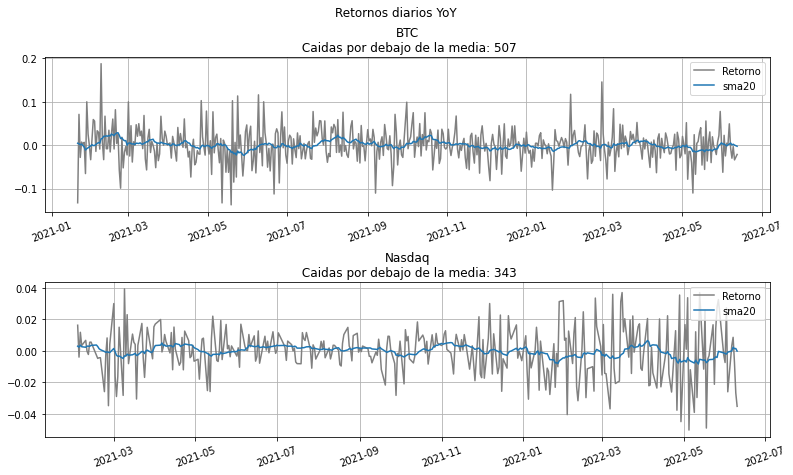

In [ ]:
fig,ax = plt.subplots(figsize=(13,7),nrows=2,ncols=1)
plt.subplots_adjust(hspace=0.45)
plt.suptitle('Retornos diarios YoY')
ax[0].plot(df['Retornos'],label='Retorno',c='GREY')
ax[0].plot(df['sma'],label='sma20')
ax[0].tick_params(axis='x', labelrotation=20 )
ax[0].set_title('BTC\n Caidas por debajo de la media: '+str(caidas_btc))
ax[0].legend()
ax[0].grid()

ax[1].plot(df1['Retornos'],label='Retorno',c='GREY')
ax[1].plot(df1['sma'],label='sma20')
ax[1].tick_params(axis='x', labelrotation= 20)
ax[1].set_title('Nasdaq\n Caidas por debajo de la media: '+str(caidas_qqq))
ax[1].legend(loc='upper right')
ax[1].grid()
